### Travel Python Notebook to Analyze Booking Data from Expedia and Airbnb Using Data from Kaggle

To Do List:
1. Load packages and data.
2. View data structure, summary statistics and plots.
3. Clean data, select and transform features.
4. Subset training data and fit models.
5. Check error rate on validation data and tune models.
6. Check model performance on test data.

Big Picture:
1. First perform a basic broad analysis.
2. Then improve by adding and trying new or more advanced techniques from books or other resources.

In [2]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [3]:
# Read Data
age_gender = pd.read_csv('./airbnb-recruiting-new-user-bookings/age_gender_bkts.csv')
countries = pd.read_csv('./airbnb-recruiting-new-user-bookings/countries.csv')
#sessions = pd.read_csv('./airbnb-recruiting-new-user-bookings/sessions.csv')
train_users = pd.read_csv('./airbnb-recruiting-new-user-bookings/train_users_2.csv')
test_users = pd.read_csv('./airbnb-recruiting-new-user-bookings/test_users.csv')

In [87]:
# Check Data Size and Structure
print(age_gender.shape)
age_gender.head(10)
# age_gender['year'].unique()

(420, 5)


,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


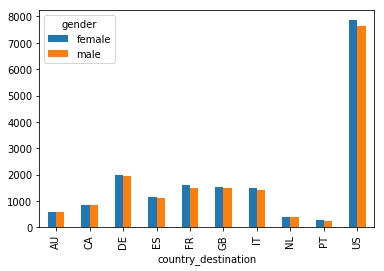

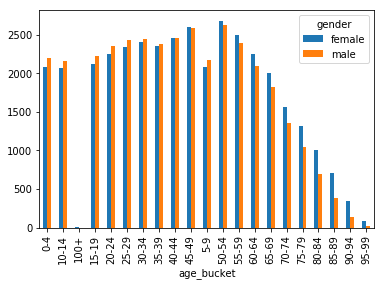

In [83]:
# Slicing by Gender
age_male = age_gender[age_gender.gender=='male']
age_female = age_gender[age_gender.gender=='female']

# Plot Data
#p1 = plt.bar(age_male['country_destination'], age_male['population_in_thousands'], facecolor='green')
#p2 = plt.bar(age_female['country_destination'], age_female['population_in_thousands'], facecolor='purple')
#plt.xlabel('Destination')
#plt.ylabel('Population')
#plt.title('Population in Each Destination by Gender')
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
#plt.show()

age_gender.groupby(['country_destination', 'gender'])['population_in_thousands'].mean().unstack().plot.bar()
age_gender.groupby(['age_bucket', 'gender'])['population_in_thousands'].mean().unstack().plot.bar()

In [5]:
print(countries.shape)
countries

(10, 7)


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [9]:
# Merge Tables Based on Destination (not sure if this is helpful)
pd.merge(age_gender, countries, on="country_destination").head(10)

,age_bucket,country_destination,gender,population_in_thousands,year,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,100+,AU,male,1.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
1,95-99,AU,male,9.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
2,90-94,AU,male,47.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
3,85-89,AU,male,118.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
4,80-84,AU,male,199.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
5,75-79,AU,male,298.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
6,70-74,AU,male,415.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
7,65-69,AU,male,574.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
8,60-64,AU,male,636.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
9,55-59,AU,male,714.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0


In [5]:
print(train_users.shape)
train_users.info()
train_users.describe()
print(train_users.columns)
#train_users.head(3)

(213451, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB
Index(['id', '

In [8]:
# Number of Unique Languages
len(train_users['language'].unique().tolist())

# Unique Categories of Selected Features
print("gender:", train_noNA['gender'].unique())
print("signup_method:", train_noNA['signup_method'].unique())
print("affiliate_channel:", train_noNA['affiliate_channel'].unique())
print("affiliate_provider:", train_noNA['affiliate_provider'].unique())
print("first_affiliate_tracked:", train_noNA['first_affiliate_tracked'].unique())
print("signup_app:", train_noNA['signup_app'].unique())
print("first_device_type:", train_noNA['first_device_type'].unique())
print("first_browser:", train_noNA['first_browser'].unique())
print("country_destination:", train_noNA['country_destination'].unique())

gender: ['FEMALE' '-unknown-' 'MALE' 'OTHER']
signup_method: ['basic' 'facebook' 'google']
affiliate_channel: ['direct' 'other' 'seo' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api']
affiliate_provider: ['direct' 'craigslist' 'google' 'other' 'facebook' 'vast' 'bing'
 'facebook-open-graph' 'email-marketing' 'meetup' 'yahoo' 'padmapper'
 'gsp' 'naver' 'baidu' 'yandex']
first_affiliate_tracked: ['untracked' 'omg' 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']
signup_app: ['Web' 'Moweb' 'iOS' 'Android']
first_device_type: ['Windows Desktop' 'Mac Desktop' 'iPhone' 'Desktop (Other)'
 'Android Tablet' 'iPad' 'Android Phone' 'Other/Unknown'
 'SmartPhone (Other)']
first_browser: ['IE' 'Firefox' 'Chrome' 'Safari' '-unknown-' 'Mobile Safari' 'RockMelt'
 'Chromium' 'Android Browser' 'Chrome Mobile' 'AOL Explorer'
 'Mobile Firefox' 'TenFourFox' 'Opera' 'Apple Mail' 'Silk' 'Camino'
 'BlackBerry Browser' 'SeaMonkey' 'IE Mobile' 'Kindle Browser' 'CoolNovo'
 'Maxthon' 'Sogou E

In [126]:
# Check for NA's and Outliers to Drop then Display Age Range
print(train_users['age'].isnull().values.any())
print(train_users['age'].isnull().sum())
train_noNA = train_users.dropna()[train_users.age<100]
print(min(train_noNA['age']), " to ", max(train_noNA['age']))

True
87990
2.0  to  99.0


C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [127]:
print(test_users.shape)
#test_users.head(3)

(62096, 15)


In [128]:
# Create a Randomly Selected Smaller Subset of the Data to Work with Since the Original Data is Too Large for My Computer
np.random.seed(12345)
train_noNA_part = train_noNA.iloc[np.random.choice(len(train_noNA), size=5000, replace=True),:]

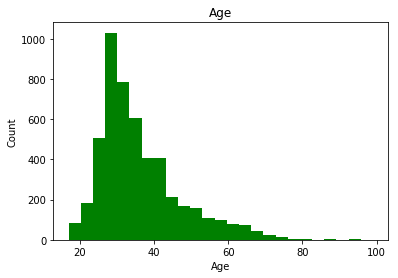

In [131]:
# Plot Data
plt.hist(train_noNA_part['age'], 25, facecolor='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')
plt.show()

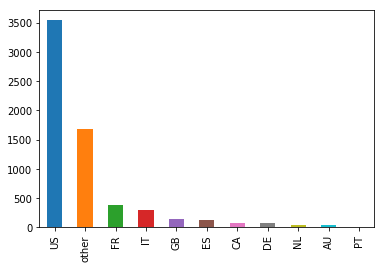

In [132]:
# Count Frequency
train_noNA_part.groupby('first_device_type').count()
train_noNA_part['first_device_type'].value_counts().plot(kind='bar')
train_noNA_part['country_destination'].value_counts().plot(kind='bar')

Notes for next time: fit models. Where will a new guest book their first travel experience?